<a href="https://colab.research.google.com/github/Yakupayaz/NLP/blob/master/Hepsiburada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NLP with DL

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import libraries

In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
df = pd.read_csv('/content/sample_data/hepsiburada.zip', encoding= "utf-8")

In [5]:
df.head()

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243497 entries, 0 to 243496
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  243497 non-null  int64 
 1   Review  243497 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [7]:
df.Rating.value_counts()

,count
Rating,
1,229821
0,13676


In [8]:
df.Rating = df.Rating.map({1:0, 0:1})
# Hedef label değerlerimizi her zaman 1 yaparız.

In [9]:
df.Rating.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

,proportion
Rating,
0,94.38%
1,5.62%


## Tokenization

In [10]:
X = df['Review']
y = df['Rating']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [12]:
num_words = 15001
 # corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) alacağız gerisini yok sayacağız.
# None değeri atanırsa tüm kelimeler dikkate alınır.
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'

In [13]:
tokenizer.fit_on_texts(X_train)
# fit_on_texts train datamızda/ corpustaki testleri tokenlara ayırıp tüm unique tokenleri tespit ederek sıklıklarına göre numaralandırır.
# en çok geçen token 1 numarası verilir.

## Creating word index

In [14]:
tokenizer.word_index

{'çok': 1,
 'bir': 2,
 've': 3,
 'ürün': 4,
 'bu': 5,
 'iyi': 6,
 'güzel': 7,
 'için': 8,
 'tavsiye': 9,
 'ederim': 10,
 'daha': 11,
 'ama': 12,
 'da': 13,
 'gayet': 14,
 'hızlı': 15,
 'teşekkürler': 16,
 'aldım': 17,
 'de': 18,
 'ürünü': 19,
 'gibi': 20,
 'yok': 21,
 'uygun': 22,
 'olarak': 23,
 'kaliteli': 24,
 'en': 25,
 'kargo': 26,
 '2': 27,
 'fiyat': 28,
 'elime': 29,
 'kadar': 30,
 'ile': 31,
 'göre': 32,
 'geldi': 33,
 'hepsiburada': 34,
 'var': 35,
 'ben': 36,
 'gerçekten': 37,
 '1': 38,
 'fiyata': 39,
 'gün': 40,
 'sonra': 41,
 'cok': 42,
 'kesinlikle': 43,
 'telefon': 44,
 'biraz': 45,
 'ulaştı': 46,
 'memnun': 47,
 'hiç': 48,
 'değil': 49,
 'hem': 50,
 'kullanışlı': 51,
 '3': 52,
 'mükemmel': 53,
 'oldu': 54,
 'kullanıyorum': 55,
 'önce': 56,
 'sipariş': 57,
 'tek': 58,
 'her': 59,
 'bence': 60,
 'harika': 61,
 'kalitesi': 62,
 'bi': 63,
 'ayrıca': 64,
 '5': 65,
 'teşekkür': 66,
 'olması': 67,
 'fiyatı': 68,
 'ne': 69,
 'herkese': 70,
 'bile': 71,
 'uzun': 72,
 'süper': 73,

In [15]:
len(tokenizer.word_index)

205230

## Converting tokens to numeric

In [16]:
X_train_num_tokens = tokenizer.texts_to_sequences(X_train)
X_test_num_tokens = tokenizer.texts_to_sequences(X_test)
# text'ten numeric verisyona çeviriyoruz.

In [17]:
len(X_train_num_tokens)

219147

In [18]:
X_test[:2]

,Review
143605,ürünü yaklaşık 2 senedir kullaniyorum. bu fiya...
133710,Ürünün tüm aparatlarını kullandım . Tereddüt e...


In [19]:
np.array(X_test_num_tokens[:2], dtype = "object")

array([list([19, 163, 27, 1047, 623, 5, 39, 25, 22, 669, 966, 225, 9, 10]),
       list([110, 173, 13278, 141, 236, 518, 106, 221, 68, 1146, 1, 435, 976, 4049, 4056, 10805, 15, 81, 3, 411, 1647, 35, 1705, 3, 173, 1073, 923, 1850, 551, 154, 13, 8050, 919, 5065, 5385, 368, 894, 4049, 243, 653, 1, 177, 2267, 8, 113, 5841, 2, 268, 2164, 1188, 13, 212])],
      dtype=object)

In [20]:
X_test.iloc[10]

'ürünün kalitesi ortada fiyata gelince samsung türkiye garantili olup tüm renk seçenekleri ile en uygun satıcı hepsiburada'

In [21]:
X_test_num_tokens[10]

[110,
 62,
 1440,
 39,
 436,
 228,
 771,
 525,
 992,
 173,
 419,
 4129,
 31,
 25,
 22,
 393,
 34]

## Maximum number of tokens for all documents

In [22]:
len(X_train_num_tokens[105])

1

In [23]:
len(X_train_num_tokens[106])

17

In [24]:
len(X_train_num_tokens[6150])

17

In [25]:
num_tokens = [len(tokens) for tokens in X_train_num_tokens]
num_tokens = np.array(num_tokens)

# train corpustaki tüm yorumların boyutlarını bir liste içine atıp num_tokens değişkenine atadık.
# Aggrigation fonksiyonlarını pratik bir şeklide arraylere uygulabildiği için listeyi array formatına dönüştürdük.

In [26]:
num_tokens

array([45,  9, 22, ...,  8,  6,  5])

In [27]:
num_tokens.mean()

21.34293875800262

In [28]:
num_tokens.max()

297

In [29]:
num_tokens.argmax() # listedeki en uzun yorumun indexini argmax ile bulabiliyoruz.

159025

In [30]:
X_train.iloc[num_tokens.argmax()]

'Özellikle bu kısma yazıyorum iyice okuyunuz,cihazın hızı çok iyi.Isınma normal boyutlarda.Kamerası elinizi sabit tutarsanız ve gündüz çok net gece ise çok net çekmez.Görüntülü konuşma özelliği yok ancak uygulama ile olur,anten çekimi gayet iyi.Parmak izi okuyucusu gayet hızlı bazen tuşu silmenizi istiyor ve okuyamıyor kirden vs...Ön kamera da tatmin edici,çekim esnasında ekran beyaz ışık vererek flaş görevi görür.Batarya bana 1 hafta gidiyor sık kullanımda ise 2-3 gün gidiyor.Hızlı şarj 1 saatte doluyor , şekilleri ele oturuyor ve şık bir görüntü var.Telefonu aldığım gün gittim ve ilk girdiğim yerden ekran koruyucu ve kılıf buldum.Kulaklık sesi çok net ve yüksek ancak kendi hoparlörü biraz zayıf sesi.Ekrana bakarken açık kalma özelliği yok.Diğer akıllı cihaz özellikleri %90 ı bu cihazda mevcut.Güç tasarrufu 2 ayrı modu var ve çok başarılı çalışıyor.4gb ram var genelde yarısı boş kalıyor.Bir de yeni cihazların çoğu titreşimi az ve sesi de az çıkıyor.Bu cihaz da içine dahil...Bu cihazla

In [31]:
len(X_train_num_tokens[num_tokens.argmax()])

297

In [32]:
max_tokens = 56 # tokenlerin %95'ini almak için 56 değerini veriyoruz.

In [33]:
sum(num_tokens < max_tokens) / len(num_tokens) # Maliyeti azaltmak için %95 ve üstü alıyoruz. Deneme yanılma ile max_tokens değeri belirliyoruz.

0.9502115018686087

In [34]:
sum(num_tokens < max_tokens)

208236

In [35]:
len(num_tokens)

219147

## Fixing token counts of all documents (pad_sequences)

In [36]:
X_train_pad = pad_sequences(X_train_num_tokens, maxlen=max_tokens, padding='pre')
X_test_pad = pad_sequences(X_test_num_tokens, maxlen=max_tokens, padding='pre')

# padding = "pre", dolgu ve kırpmalar baştan yapılır.
# padding = "post", dolgu ve ırpmalaraı sondan alır. Artık hangisi iyi sonuç verirse onunla devam edilir.

# pad_sequences fonksiyonu içine yorumların numeric versiyonları ve sabitleyeceği uzunluk verilerek tüm yorumlar 56 tokene sabitlenir.
# 56'dan daha az tokene sahip yorumlar, yorum başına ilave edilecek şekilde 0'lar doldurulur.
# 56'dan fazla olan sahip yorumlarda, yorumun başından olacak şekilde tokenler kırpılır.

In [37]:
X_train_pad.shape

(219147, 56)

In [38]:
np.array(X_train_num_tokens[800])

array([  19,  524,  121,  466,   55,    3,    1,   83,   74,    2, 2741,
        878,   45,  206, 4105,   93, 1036,   68,   13,    1,   22,    9,
         10])

In [39]:
len(np.array(X_train_num_tokens[800]))

23

In [40]:
np.array(X_train_num_tokens[159025])

array([  144,     5,  6034,  2262,  1616,   911,   203,     1,     6,
        2938,   164,  4523,   374,  3443,  1531, 13099,     3,  1391,
           1,   493,   280,   140,     1,   493,  3267,  2386,   239,
          21,    82,   760,    31,   212,  4785,  1431,    14,     6,
         471,   607,  2161,    14,    15,   664,  1736,  2166,     3,
         313,   444,   258,    13,   568,   460,   468,  1649,   166,
         648,   509,  3232,  5471,  6629,   604,   620,   153,    38,
         194,   273,   632,   404,   140,    27,    52,    40,   273,
          15,    81,    38,   461,  1670, 12275,  1038,   982,     3,
          96,     2,   317,    35,   134,   170,    40,  2837,     3,
          76,   751,   166,   906,     3,   515,   573,   362,   195,
           1,   493,     3,   172,    82,   255,  6411,    45,   925,
         195,  2075,  7012,   599,  7808,   239,    21,   104,   928,
         135,   391,  1303,  1875,     5,  2156,   569,  1053,  2204,
          27,   335,

In [41]:
X_train_pad[159025]

array([2208,   75,  164,    2,  443,   13, 1284, 1840, 3302,    5,  822,
       7712,  856, 1658, 7573, 3445,   12, 1284,   31, 3099,  300, 2720,
        854, 1052,   39, 1478, 3341,  319, 1188,   75,  534,   49,  331,
        248, 1317,  120,    2, 3341, 7321,  200,  269,  577, 5857, 1869,
         13,   45,  805,  108,    3,  866,  758, 5709,   49,  106,   77,
        886], dtype=int32)

## Modelling

In [42]:
model = Sequential()

# Bu model katmanları(layer) birbirini ardışık olarak takip eder.
# Layerlar, Sequantial modeline add metoduyla eklenir.

In [43]:
embedding_size = 50

In [44]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size))

model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12, return_sequences=False))

model.add(Dense(1, activation='sigmoid'))

In [45]:
optimizer = Adam(learning_rate=0.008)

In [46]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_Recall", mode="max",
                           verbose=1, patience = 1, restore_best_weights=True)

In [48]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.52975261, 8.90262431])

In [49]:
model.fit(X_train_pad,
          y_train,
          epochs=10, batch_size=256,
          sample_weight= classes_weights,
         validation_data=(X_test_pad, y_test),
          callbacks=[early_stop])

Epoch 1/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 285s 323ms/step - Recall: 0.8180 - loss: 0.3902 - val_Recall: 0.7865 - val_loss: 0.1354
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_recall` which is not available. Available metrics are: Recall,loss,val_Recall,val_loss
  current = self.get_monitor_value(logs)


857/857 ━━━━━━━━━━━━━━━━━━━━ 278s 273ms/step - Recall: 0.9248 - loss: 0.2006 - val_Recall: 0.8582 - val_loss: 0.1834
Epoch 3/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 236s 276ms/step - Recall: 0.9539 - loss: 0.1521 - val_Recall: 0.8545 - val_loss: 0.1886
Epoch 4/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 267s 282ms/step - Recall: 0.9635 - loss: 0.1300 - val_Recall: 0.8224 - val_loss: 0.1793
Epoch 5/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 258s 277ms/step - Recall: 0.9620 - loss: 0.1269 - val_Recall: 0.8458 - val_loss: 0.2049
Epoch 6/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 238s 278ms/step - Recall: 0.9620 - loss: 0.1283 - val_Recall: 0.8348 - val_loss: 0.1974
Epoch 7/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 257s 272ms/step - Recall: 0.9616 - loss: 0.1287 - val_Recall: 0.7931 - val_loss: 0.1706
Epoch 8/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 266s 277ms/step - Recall: 0.9619 - loss: 0.1255 - val_Recall: 0.8129 - val_loss: 0.1947
Epoch 9/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 262s 277ms/step - Recall: 0.9622 - loss: 0.1258 - val_Recall: 0.8019 - val_

## Model evaluation

In [50]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,Recall,loss,val_Recall,val_loss
0,0.867403,0.318470,0.786550,0.135401
1,0.928096,0.200601,0.858187,0.183402
2,0.947189,0.161901,0.854532,0.188627
3,0.956289,0.141704,0.822368,0.179317
4,0.956451,0.138325,0.845760,0.204851


<Axes: >

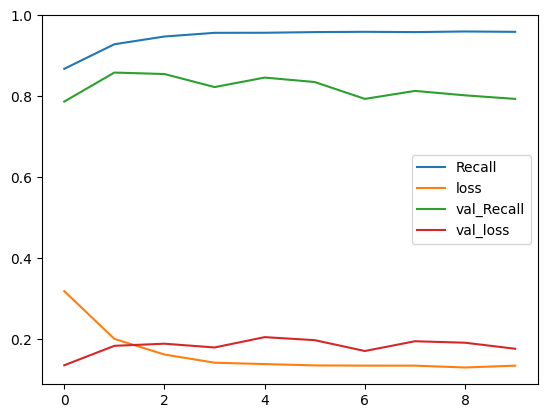

In [51]:
model_loss.plot()

In [54]:
model.evaluate(X_test_pad, y_test)

761/761 ━━━━━━━━━━━━━━━━━━━━ 39s 51ms/step - Recall: 0.7982 - loss: 0.1814


[0.17615896463394165, 0.7931286692619324]

In [55]:
model.evaluate(X_train_pad, y_train)

6849/6849 ━━━━━━━━━━━━━━━━━━━━ 153s 22ms/step - Recall: 0.9688 - loss: 0.1052


[0.10423950850963593, 0.9701007604598999]

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test_pad) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

761/761 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step
[[21703  1279]
 [  283  1085]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.94      0.97     22982
           1       0.46      0.79      0.58      1368

    accuracy                           0.94     24350
   macro avg       0.72      0.87      0.77     24350
weighted avg       0.96      0.94      0.94     24350



In [57]:
y_train_pred = model.predict(X_train_pad) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

6849/6849 ━━━━━━━━━━━━━━━━━━━━ 155s 23ms/step
[[198616   8223]
 [   368  11940]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    206839
           1       0.59      0.97      0.74     12308

    accuracy                           0.96    219147
   macro avg       0.80      0.97      0.86    219147
weighted avg       0.98      0.96      0.97    219147



761/761 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step


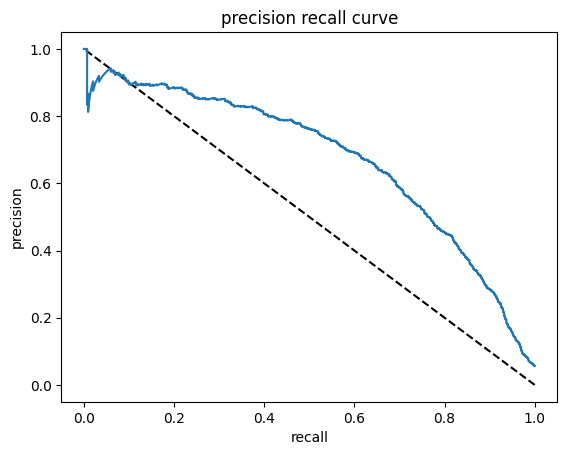

In [58]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test_pad)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [59]:
average_precision_score(y_test, y_pred_proba)

0.6723385287061139

## Model Saving

In [60]:
#model.save('review_hepsiburada.h5')

##Loading Model

In [61]:
#from tensorflow.keras.models import load_model
#model_review = load_model('/content/drive/MyDrive/review_hepsiburada.h5')

## Predicton

In [62]:
review1 = "çok beğendim herkese tavsiye ederim"
review2 = "süper ürün"
review3 = "büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım"
review4 = "kelimelerle tarif edilemez"
review5 = "tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten"
review6 = "hiç resimde gösterildiği gibi değil"
review7 = "kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım."
review8 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum"
review9 = "tam bir fiyat performans ürünü"
review10 = "beklediğim gibi çıkmadı"
review11 = "on numara beş yıldız"
review12 = "üründe sıkıntı var"
review13 = "televizyonun görüntü kalitesi çok kötü, dün akşam evde arkadaşlarla toplandık. yedik, içtik, sohbet ettik. Sonra televizyonda Türkiye - İngiltere maçını seyrettik."
review14 = '1 gün gibi kısa bir sürede elime geçti. Ve bu fıyata süper bir ürün tavsiye ederim. Lakin eli büyük olan kişiler daha büyük modelini tercih edebilirler ortaboy ürün.Teşekkürler '
review15 = 'telefon kesinlikle bu parayı hak etmiyor. yeni hiç bir özelliği yok. ancak küçük ekran sevenler için iyi bir telefon'
review16 = 'müthiş bir telefon ama bu parayı hak etmiyor'
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14, review15, review16]

In [63]:
tokens = tokenizer.texts_to_sequences(reviews)

In [64]:
tokens

[[1, 146, 70, 9, 10],
 [73, 4],
 [103, 2, 1031, 2290, 1459, 5, 19, 5, 1784, 11674],
 [4235, 11684],
 [556, 61, 82, 26, 1, 445, 33, 3, 4, 1031, 2290, 37],
 [48, 1103, 6142, 20, 49],
 [177, 746, 7522, 82, 261, 105, 326],
 [48, 5, 30, 177, 2, 1742, 1235, 4, 1755, 4934, 84],
 [74, 2, 28, 111, 19],
 [636, 20, 859],
 [392, 178, 1007, 513],
 [453, 147, 35],
 [6953, 317, 62, 1, 177, 376, 475, 286, 6350, 1380, 41, 9533, 771],
 [38,
  40,
  20,
  108,
  2,
  161,
  29,
  149,
  3,
  5,
  2891,
  73,
  2,
  4,
  9,
  10,
  1191,
  2394,
  103,
  113,
  2024,
  11,
  103,
  1155,
  176,
  12442,
  4,
  16],
 [44,
  43,
  5,
  1242,
  490,
  733,
  136,
  48,
  2,
  239,
  21,
  82,
  116,
  166,
  1620,
  8,
  6,
  2,
  44],
 [585, 2, 44, 12, 5, 1242, 490, 733]]

In [65]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
tokens_pad.shape

(16, 56)

In [66]:
prob = model.predict(tokens_pad)
prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


array([[0.00635012],
       [0.02056732],
       [0.99582875],
       [0.02020362],
       [0.9549157 ],
       [0.98605084],
       [0.69717455],
       [0.83770186],
       [0.03116789],
       [0.953314  ],
       [0.00696878],
       [0.7468319 ],
       [0.92577255],
       [0.02225654],
       [0.99778676],
       [0.9612316 ]], dtype=float32)

In [67]:
pred = (model.predict(tokens_pad) >0.5).astype("int")
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1]])

In [68]:
pd.set_option('display.max_colwidth', None)
my_dict = {"Review":reviews, "prob":[i[0] for i in prob], "classes":[i[0] for i in pred]}
pd.DataFrame(my_dict)

,Review,prob,classes
0,çok beğendim herkese tavsiye ederim,0.006350,0
1,süper ürün,0.020567,0
2,büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım,0.995829,1
3,kelimelerle tarif edilemez,0.020204,0
4,tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten,0.954916,1
5,hiç resimde gösterildiği gibi değil,0.986051,1
6,kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım.,0.697175,1
7,hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum,0.837702,1
8,tam bir fiyat performans ürünü,0.031168,0
9,beklediğim gibi çıkmadı,0.953314,1


In [69]:
count=0
for i, j in enumerate(X):
  if "hak etmiyor" in j.lower() and y[i]==1:
    count+=1
count

31

#Tokenizer Saving

In [70]:
# import joblib

# joblib.dump(tokenizer, "/content/drive/MyDrive/tokenizzer.joblib")

# pckle kütüphanesini de kullanarak kaydedebiliriz.

#Loading Tokenizer

In [71]:
#loaded_tokenizer = joblib.load("/content/drive/MyDrive/tokenizzer.joblib")